In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Import Data

In [2]:
df = pd.read_excel("default.xlsx")
df.info()
#this shows the 30,000 observations each with 24 attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30001 non-null  int64
 1   LIMIT_BAL                   30001 non-null  int64
 2   SEX                         30001 non-null  int64
 3   EDUCATION                   30001 non-null  int64
 4   MARRIAGE                    30001 non-null  int64
 5   AGE                         30001 non-null  int64
 6   PAY_0                       30001 non-null  int64
 7   PAY_2                       30001 non-null  int64
 8   PAY_3                       30001 non-null  int64
 9   PAY_4                       30001 non-null  int64
 10  PAY_5                       30001 non-null  int64
 11  PAY_6                       30001 non-null  int64
 12  BILL_AMT1                   30001 non-null  int64
 13  BILL_AMT2                   30001 non-null  int64
 14  BILL_A

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


# 2. Data Preprocessing and Explatory Analysis

In [4]:
df.isnull().values.any()
#on first glance the dataset seems cleaned and fit for purpose in regards to data analysis due to the absence of missing
#values but upon further inspection this is not the case
#for example some of the columns aren't names cleanly/correctly e.g. pay_0 should be pay_1 and default payment, 
#can be simplified, the ID

False

In [5]:
#tidying up the actual dataset headers

df.rename(columns = {"PAY_0" : "PAY_1"}, inplace = True)
df.rename(columns = {"default payment next month" : "Default"}, inplace = True)

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [7]:
#getting rid of ID column and first row as they aren't needed and clog up the dataset 
df.drop("ID", axis = 1, inplace = True)
updated_df = (df.drop(df.index[0]))
df = updated_df
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
df['SEX'].value_counts()
#this data is okay and doesn't need any manipulation

2    18112
1    11888
Name: SEX, dtype: int64

In [9]:
df['Default'].value_counts()
#this data is also okay and doesnt need any manipulation

0    23364
1     6636
Name: Default, dtype: int64

In [10]:
df['MARRIAGE'].value_counts()
#here we are needing to deal with the presence of the 0 as it is not listed in the description of the dataset

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [11]:
df['EDUCATION'].value_counts()
#here we are needing to deal with the presence of the 0's, 5's and 6's as they are not listed in the datasets description

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

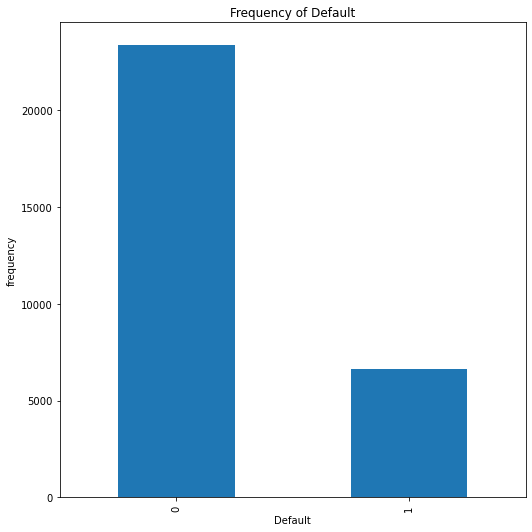

In [12]:
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df['Default'].value_counts().plot(ax=ax, kind='bar', xlabel='Default', ylabel='frequency', title= 'Frequency of Default')
plt.show()
#Larger proportion of not default than default which is to be expected and a good balance so we wont need to take
#a subset to find significant correlations in the dataset
#0 == Not Default
#1 == Default 

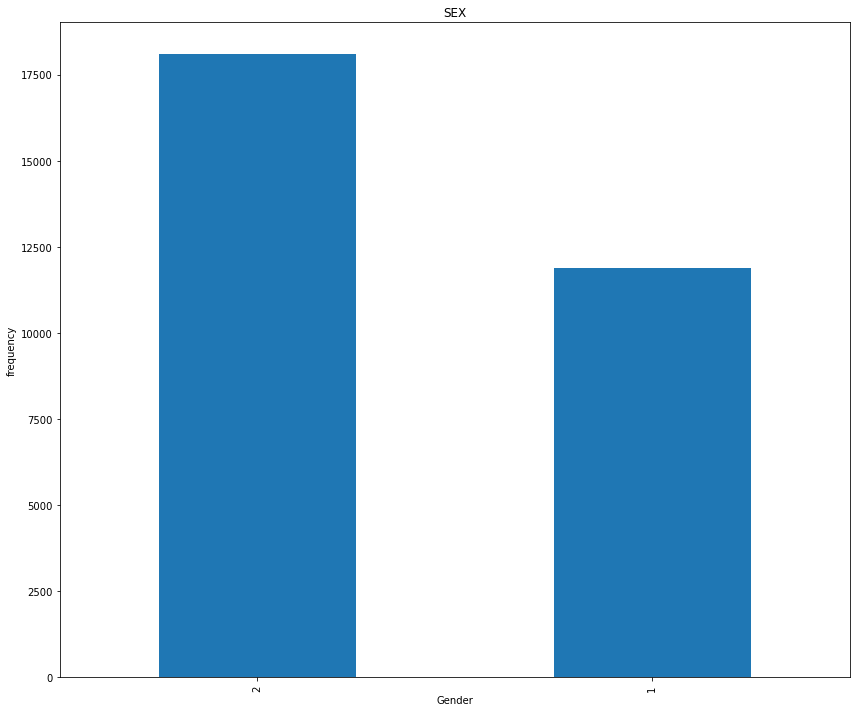

In [13]:
plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df['SEX'].value_counts().plot(ax=ax, kind='bar', xlabel='Gender', ylabel='frequency', title= 'SEX')
plt.show()
#there are significantly more women in the dataset than men
#1 == Male
#2 == Female

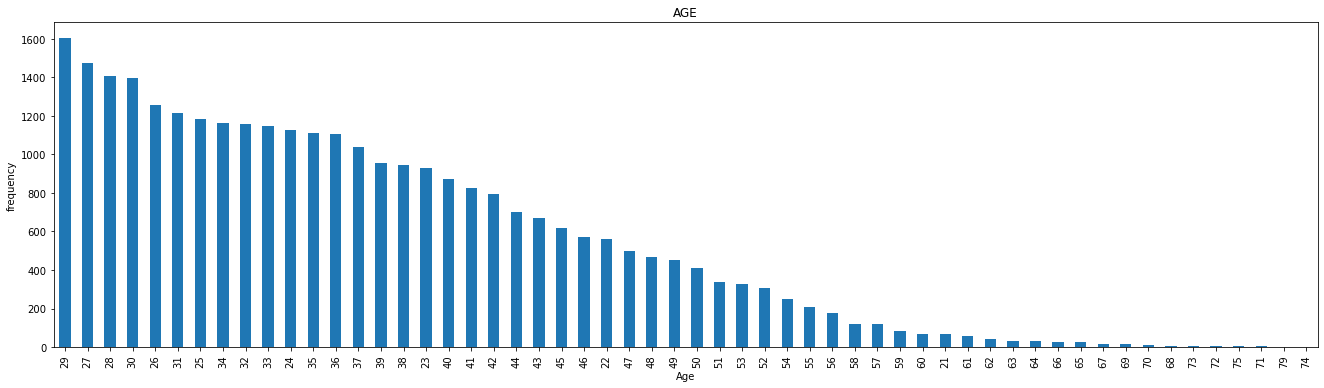

In [14]:
plt.rcParams["figure.figsize"] = [18.50, 5.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df['AGE'].value_counts().plot(ax=ax, kind='bar', xlabel='Age', ylabel='frequency', title= 'AGE')
plt.show()
#wide range of ages with the mode being 29 with ages 25-34 most represented 

In [15]:
#in the case of our dataset, we need to deal with the anomalous values i.e. 
#MARRIAGE : 0 values (54)
#EDUCATION 0, 5 and 6 values (14, 280, 51 respectively)
#in total these come to 399 indivudal pieces of data which is an insiginificant amount in the wider context of the dataset
#therefore they can simply be deleted 
df.drop(df[df['MARRIAGE'] == 0].index, inplace = True)
df.drop(df[df['EDUCATION'] == 0].index, inplace = True)
df.drop(df[df['EDUCATION'] == 5].index, inplace = True)
df.drop(df[df['EDUCATION'] == 6].index, inplace = True)
df.LIMIT_BAL.describe()

count      29601.000000
mean      167550.544914
std       129944.020953
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

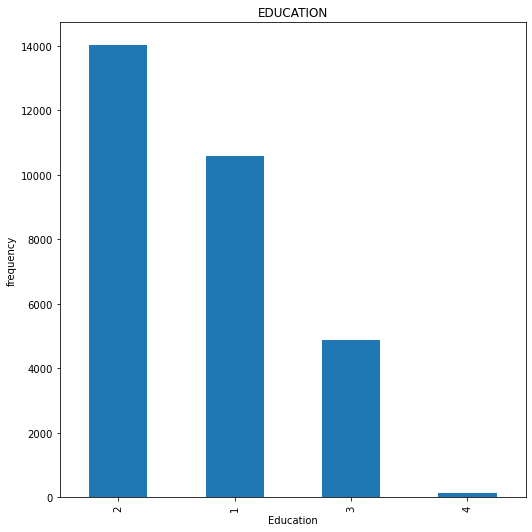

In [16]:
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df['EDUCATION'].value_counts().plot(ax=ax, kind='bar', xlabel='Education', ylabel='frequency', title= 'EDUCATION')
plt.show()
#1 == Graduate School
#2 == University
#3 == High School
#4 == Others

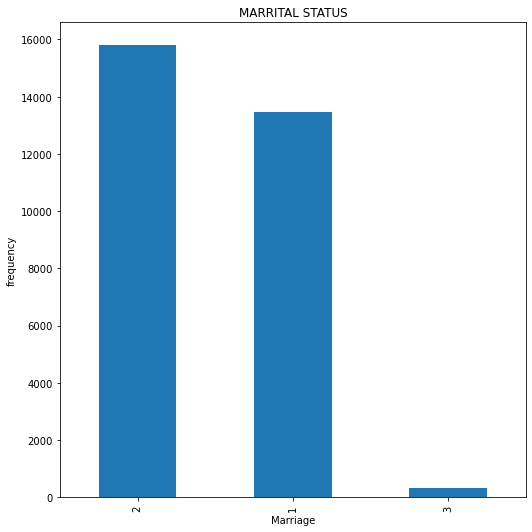

In [17]:
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df['MARRIAGE'].value_counts().plot(ax=ax, kind='bar', xlabel='Marriage', ylabel='frequency', title= 'MARRITAL STATUS')
plt.show()
#1 == married
#2 == single
#3 == other

In [18]:
#when closely analysing the data in PAY_1 -> PAY_6 the datasets description tells us the values range from -1 to 9 
#where -1 is pay duly (they pay on time) and -1 meaning 1 month late, 2 meaning 2 months late etc, until 9
#which means 9 months or above
#HOWEVER when analysing the data closely we can see that the range of values is -2 to 8 which insinuates a scaling error
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,-0.014932,-0.131313,-0.163440,-0.218303,-0.263978,-0.287558
std,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [19]:
#Therefore to ammend this, we can add one to each of the PAY_X columns 
df['PAY_1'] = df['PAY_1'] + 1
df['PAY_2'] = df['PAY_2'] + 1
df['PAY_3'] = df['PAY_3'] + 1
df['PAY_4'] = df['PAY_4'] + 1
df['PAY_5'] = df['PAY_5'] + 1
df['PAY_6'] = df['PAY_6'] + 1

df.PAY_1.value_counts()
#however using PAY_1 as an example to see the output we see that we still have a value of 0, which is undocummented

 1    14499
 0     5633
 2     3662
-1     2708
 3     2640
 4      320
 5       76
 6       24
 9       19
 7       11
 8        9
Name: PAY_1, dtype: int64

In [20]:
#therefore to deal with this, we will group 0 and -1 as a value of 0 insinuates an ontime payment 
#we will be using a numpy function np.where() to achieve this 
#therefore when combining the values of 0 and -1 we should have 8341 instances where the individual paid on time when using
#PAY_1 as an example 
#MAYBE WANNA THINK ABOUT COMBINING 0 AND 1
import numpy as np
df['PAY_1'] = np.where(df['PAY_1'] == 0, -1, df['PAY_1'])
df['PAY_2'] = np.where(df['PAY_2'] == 0, -1, df['PAY_2'])
df['PAY_3'] = np.where(df['PAY_3'] == 0, -1, df['PAY_3'])
df['PAY_4'] = np.where(df['PAY_4'] == 0, -1, df['PAY_4'])
df['PAY_5'] = np.where(df['PAY_5'] == 0, -1, df['PAY_5'])
df['PAY_6'] = np.where(df['PAY_6'] == 0, -1, df['PAY_6'])
df.PAY_1.value_counts()

 1    14499
-1     8341
 2     3662
 3     2640
 4      320
 5       76
 6       24
 9       19
 7       11
 8        9
Name: PAY_1, dtype: int64

In [21]:
df.LIMIT_BAL.describe()
#Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her 
#family (supplementary) credit.

count      29601.000000
mean      167550.544914
std       129944.020953
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

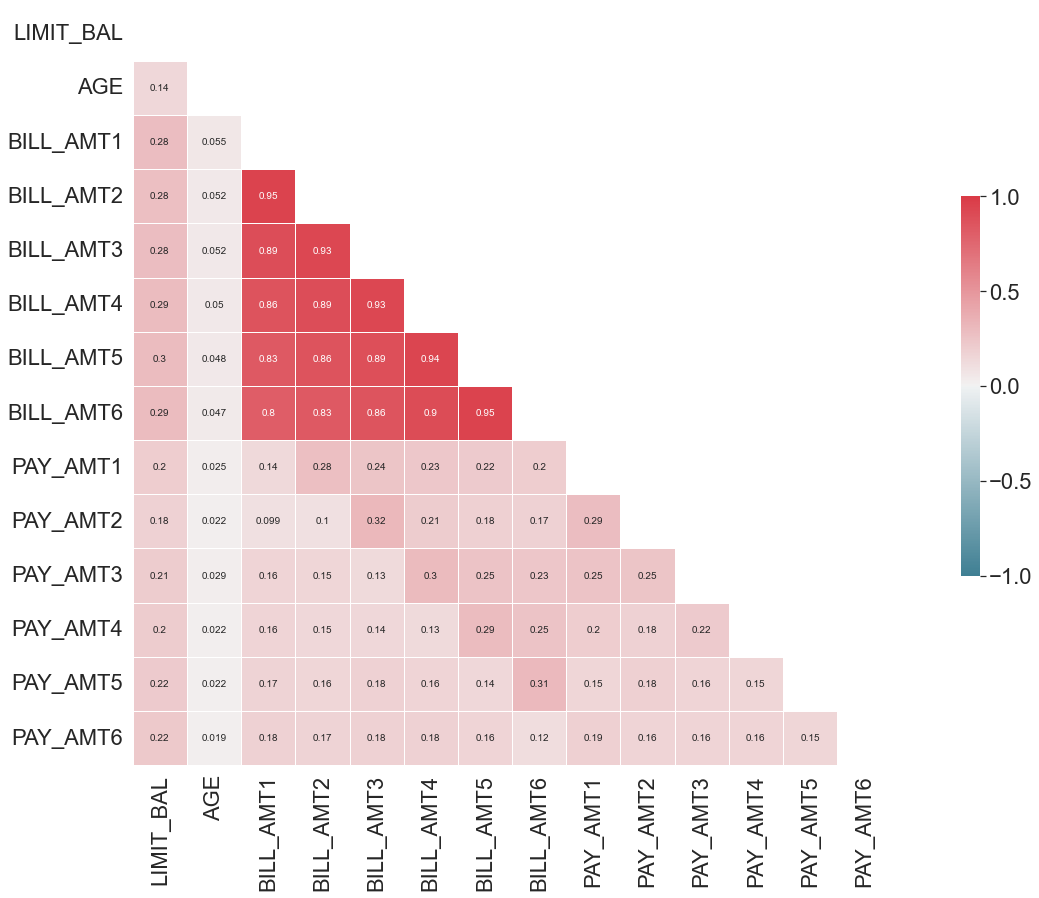

In [22]:
import seaborn as sns

sns.set(style="white", font_scale=2)
numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
corr = df[numeric].corr() 

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
plt.savefig('Fig - Correlation matrix by means of the Pearson’s coefficient for all feature pairs.png')

#This correlation matrix shows us that all variables are at least positively correlated however certain ones have a pearson
#correlation co-efficients, for example 
#BILL_AMT5 & BILL_AMT6 and BILL_AMT1 & BILL_AMT2 both have P = 0.95
#BILL_AMT2 & BILL_AMT3 and BILL_AMT3 & BILL_AMT4 both have P = 0.93
#BILL_AMT4 & BILL_AMT5 have a p = 0.94

#COPIED CODE FROM EXAMPLE.

In [23]:
#DATA PRE-PROCESSING

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['LIMIT_BAL'] = scaler.fit_transform(df['LIMIT_BAL'].values.reshape(-1, 1))
df['AGE'] = scaler.fit_transform(df['AGE'].values.reshape(-1, 1))

for i in range(1,7):
    scaler = MinMaxScaler()
    df['PAY_' + str(i)] = scaler.fit_transform(df['PAY_' + str(i)].values.reshape(-1, 1))

for i in range(1,7):
    scaler = MinMaxScaler()
    df['BILL_AMT' + str(i)] = scaler.fit_transform(df['BILL_AMT' + str(i)].values.reshape(-1, 1))

for i in range(1,7):
    scaler = MinMaxScaler()
    df['PAY_AMT' + str(i)] = scaler.fit_transform(df['PAY_AMT' + str(i)].values.reshape(-1, 1))
    
#applied the min/max scalars on all the variables
#as input variables may have different units, they could have different scales and magnitudes so a scalar is used to fit 
#all features between the values of 0-1, with 0 being the minimum values and 1 being the maximum.
#i.e. for the purpose of normalization, this scalar was applied to all attributes so they all have the same scale
#else comparisons are impossible.

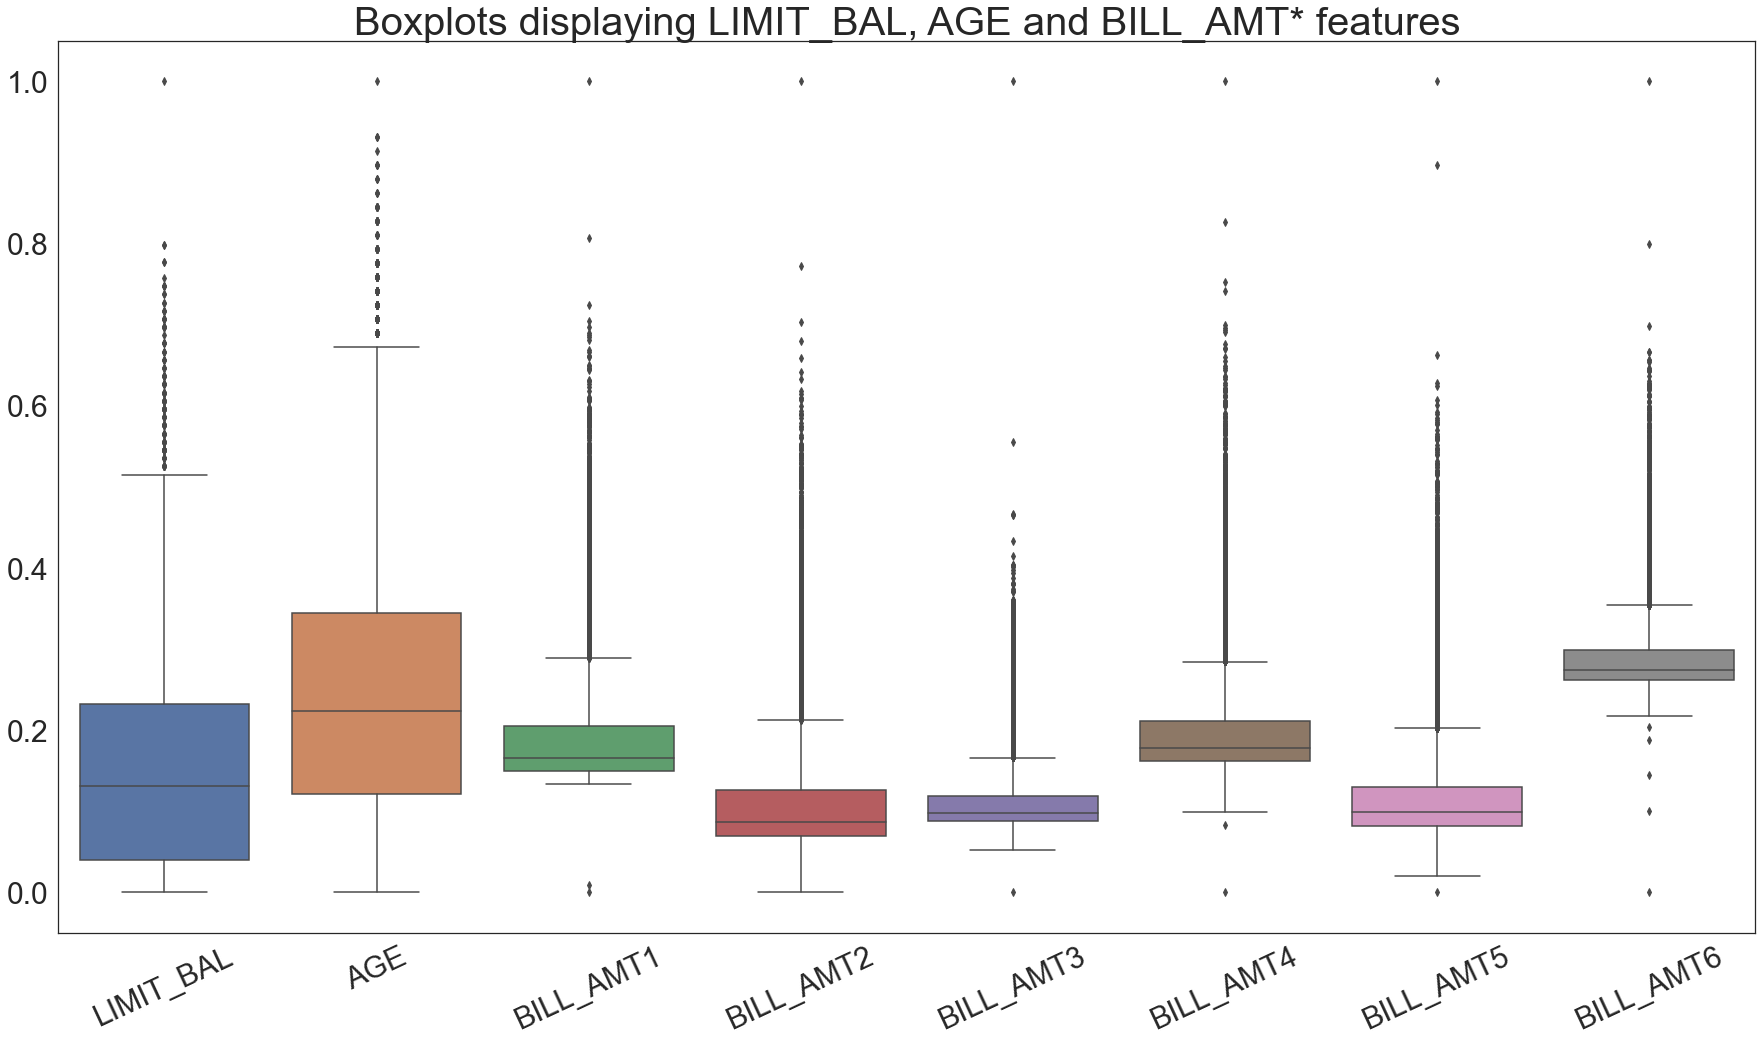

In [24]:
# BOXPLOT
cols = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

fig=plt.figure(1, figsize=(25,15))
ax=fig.add_subplot(111)
sns.boxplot(data=df[cols], )
plt.xticks(np.arange(0,8), labels=cols, rotation=25, fontsize=30)
plt.yticks(fontsize=30)
plt.title('Boxplots displaying LIMIT_BAL, AGE and BILL_AMT* features', fontsize= 40)

plt.savefig('Fig - Boxplot')


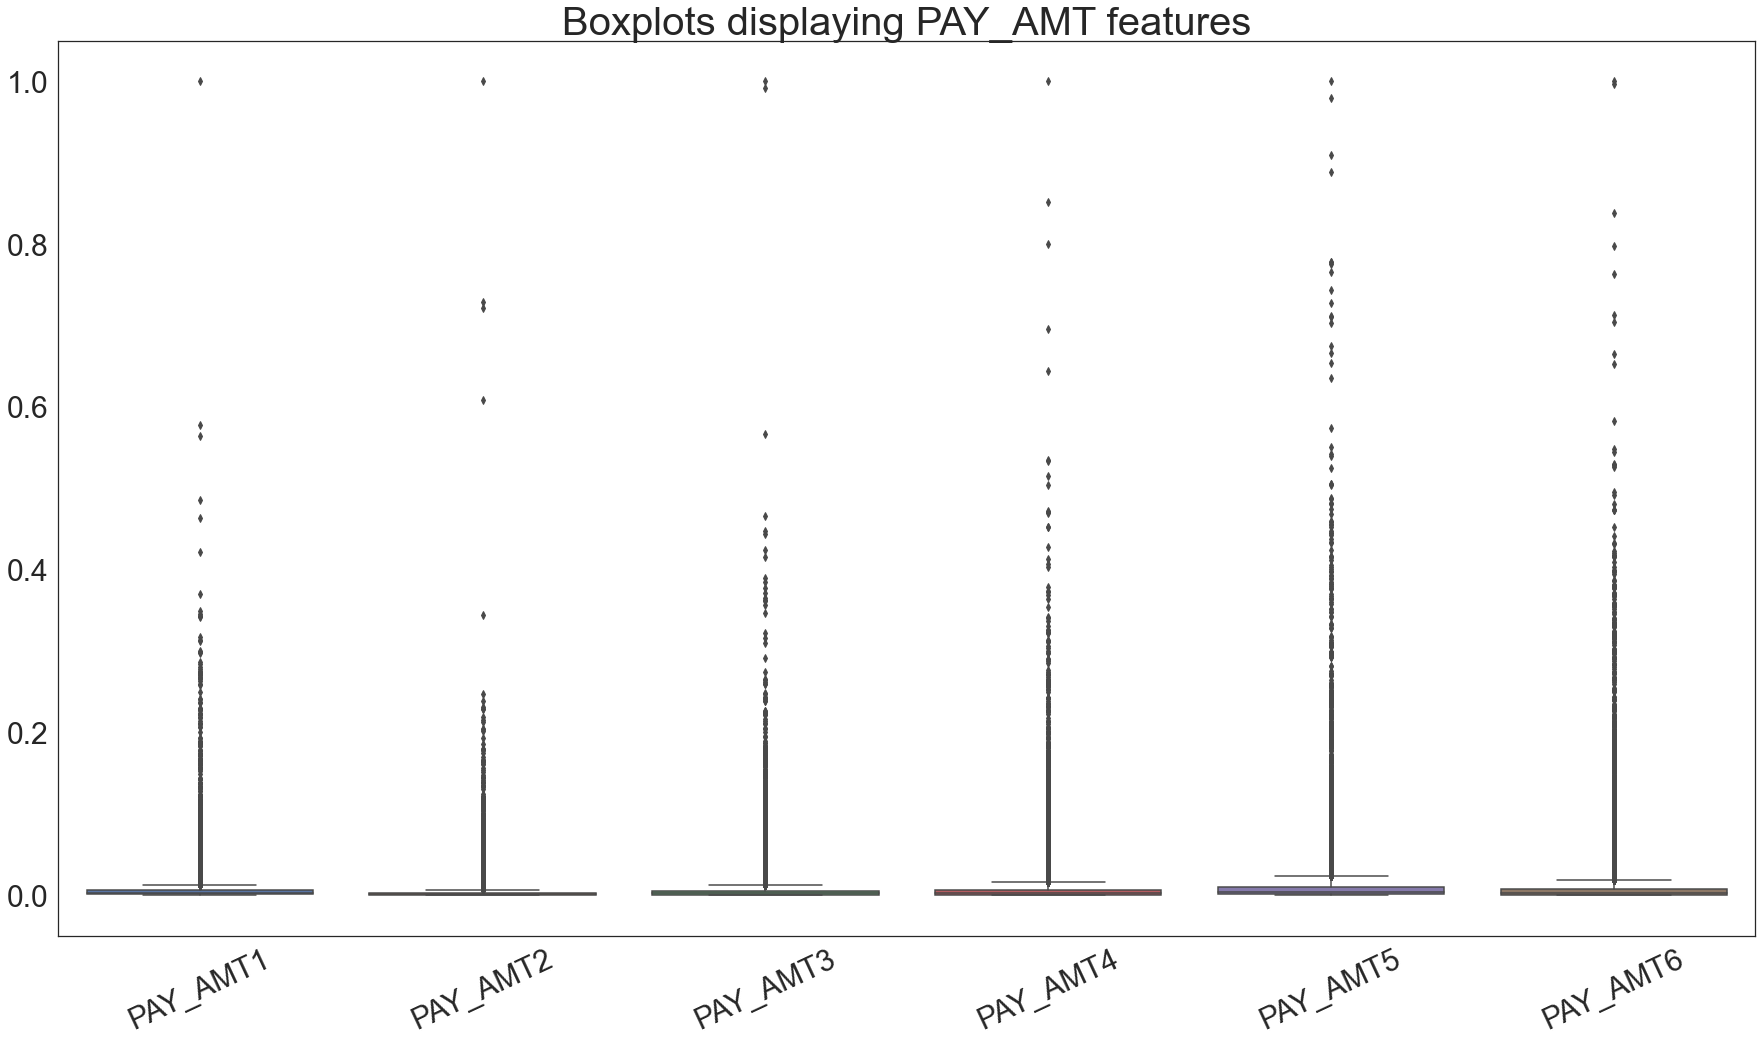

In [25]:
cols = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
fig=plt.figure(1, figsize=(25,15))
ax=fig.add_subplot(111)
sns.boxplot(data=df[cols], )
plt.xticks(np.arange(0,6), labels=cols, rotation=25, fontsize=30)
plt.yticks(fontsize=30)
plt.title('Boxplots displaying PAY_AMT features', fontsize= 40)

plt.savefig('Fig - Boxplot')


In [26]:
#the features Sex, Education and Marriage currently are encoded with integers, however this may return us some ordinal
#relationships, where said relationship does not exist, therefore one-hot encoding is a data pre-processing method we
#have chosen to implement. This means instead of a integer encoding, a binary encoding is used where
#e.g. with Sex 1 == male == 10, 2 == female == 01
for att in ['SEX', 'EDUCATION', 'MARRIAGE']:
  df[att] = df[att].astype('category')

# one-hot encoding
df = pd.concat([pd.get_dummies(df['SEX'], prefix = 'SEX'),
                pd.get_dummies(df['EDUCATION'], prefix = 'EDUCATION'), 
                pd.get_dummies(df['MARRIAGE'], prefix = 'MARRIAGE'),
                df], axis = 1)
#after this we are able to drop the original columns. 
df.drop(['SEX'], axis = 1, inplace = True)
df.drop(['EDUCATION'], axis = 1, inplace = True)
df.drop(['MARRIAGE'], axis = 1, inplace = True)

df.head()
#here we will see the one-hot encoding for the above 3 features, AND the features of BILL_AMTX and PAY_AMTX scaled with min_max

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1,0,1,0,1,0,0,1,0,0,0.010101,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
2,0,1,0,1,0,0,0,1,0,0.111111,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
3,0,1,0,1,0,0,0,1,0,0.080808,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
4,0,1,0,1,0,0,1,0,0,0.040404,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
5,1,0,0,1,0,0,1,0,0,0.040404,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0


In [27]:
#before beginning with dimensionality reduction, we will initialize the test-train split
#To do this we will seperate the features (everything BUT Default) to the target (Default)
y = df.Default
X = df.drop('Default', axis = 1, inplace = False)

#checking this seperation is correct by checking the dimensions of X
print(X.shape)
print("Number of samples: ", X.shape[0])     #will give 29601, as its all original features, - the 399 dropped features
print("Number of attributes: ", X.shape[1])  #will give 29 as its all features - the target 

(29601, 29)
Number of samples:  29601
Number of attributes:  29


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
#random_state = 42 => means the dataset will be split completely randombly so our findings can be reproduced
#42 is an arbitary number used that is the standard across the machine learning world, the number can be anything but 
#42 is commonly used, and this will ensure the same set of pseudo-random numbers is generated each time we run the program
#test_size = 20%  => giving us an 80/20 split of the data 
#stratify = y => returns training and test subsets that have the same proportions of class labels as the input dataset

#CHECKING DIMENSIONS OF TRAIN AND TEST SETS
print(np.shape(X_train))
print(np.shape(X_test))

print("Training set:")
print(f" + Non-default (y=0): {len(y_train[y_train==0])}")
print(f" + Default (y=1):\t {len(y_train[y_train==1])}")

print("Test set:")
print(f" + Non-default (y=0): {len(y_test[y_test==0])}")
print(f" + Default (y=1):\t {len(y_test[y_test==1])}")

(23680, 29)
(5921, 29)
Training set:
 + Non-default (y=0): 18396
 + Default (y=1):	 5284
Test set:
 + Non-default (y=0): 4600
 + Default (y=1):	 1321


In [29]:
#however from our correlation matrix we saw that some features were not independant therefore we will remove all
#features where the pearson value was greater than or equal to 0.92
FEATURE_SELECTION = True

# if 'True' Feature Selection will be applied (i.e. 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6' 
#will be removed)

if FEATURE_SELECTION:
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] >= 0.92)]
    print(to_drop) #['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
    df = df.drop(df[to_drop], axis = 1)
    

df.head()

#In our data-analysis through our correlation matrix we found that the features BILL_AMT2 to BILL_AMT6 had a high pearson 
#coefficent, therefore removing these from the dataset will help keep our data finding relevant and not include 
#information that would be redundant
#Therefore, those features printed below have been removed 

['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,...,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1,0,1,0,1,0,0,1,0,0,0.010101,...,0.0,0.0,0.149982,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
2,0,1,0,1,0,0,0,1,0,0.111111,...,0.2,0.4,0.148892,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
3,0,1,0,1,0,0,0,1,0,0.080808,...,0.2,0.2,0.172392,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
4,0,1,0,1,0,0,1,0,0,0.040404,...,0.2,0.2,0.188100,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
5,1,0,0,1,0,0,1,0,0,0.040404,...,0.2,0.2,0.154144,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0


# Train Test Split

In [30]:
# Separating features and target
y = df.Default     # target default=1 or non-default=0
X = df.drop('Default', axis = 1, inplace = False)

In [31]:
# Check data set dimension
print(X.shape)
print("Number of samples:", X.shape[0])
print("Number of attributes:", X.shape[1])

(29601, 24)
Number of samples: 29601
Number of attributes: 24


In [32]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [33]:
# Check dimensions
print(np.shape(X_train_val))
print(np.shape(X_test))

print("Training set:")
print(f" + Non-defaulters (y=0): {len(y_train_val[y_train_val==0])}")
print(f" + Defaulters (y=1):\t {len(y_train_val[y_train_val==1])}")

print("Test set:")
print(f" + Non-defaulters (y=0): {len(y_test[y_test==0])}")
print(f" + Defaulters (y=1):\t {len(y_test[y_test==1])}")

(23680, 24)
(5921, 24)
Training set:
 + Non-defaulters (y=0): 18396
 + Defaulters (y=1):	 5284
Test set:
 + Non-defaulters (y=0): 4600
 + Defaulters (y=1):	 1321


# Dimensionality Reduction with PCA

In [34]:
df.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,...,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1,0,1,0,1,0,0,1,0,0,0.010101,...,0.0,0.0,0.149982,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
2,0,1,0,1,0,0,0,1,0,0.111111,...,0.2,0.4,0.148892,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
3,0,1,0,1,0,0,0,1,0,0.080808,...,0.2,0.2,0.172392,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
4,0,1,0,1,0,0,1,0,0,0.040404,...,0.2,0.2,0.188100,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
5,1,0,0,1,0,0,1,0,0,0.040404,...,0.2,0.2,0.154144,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0


Actual number of components: 24


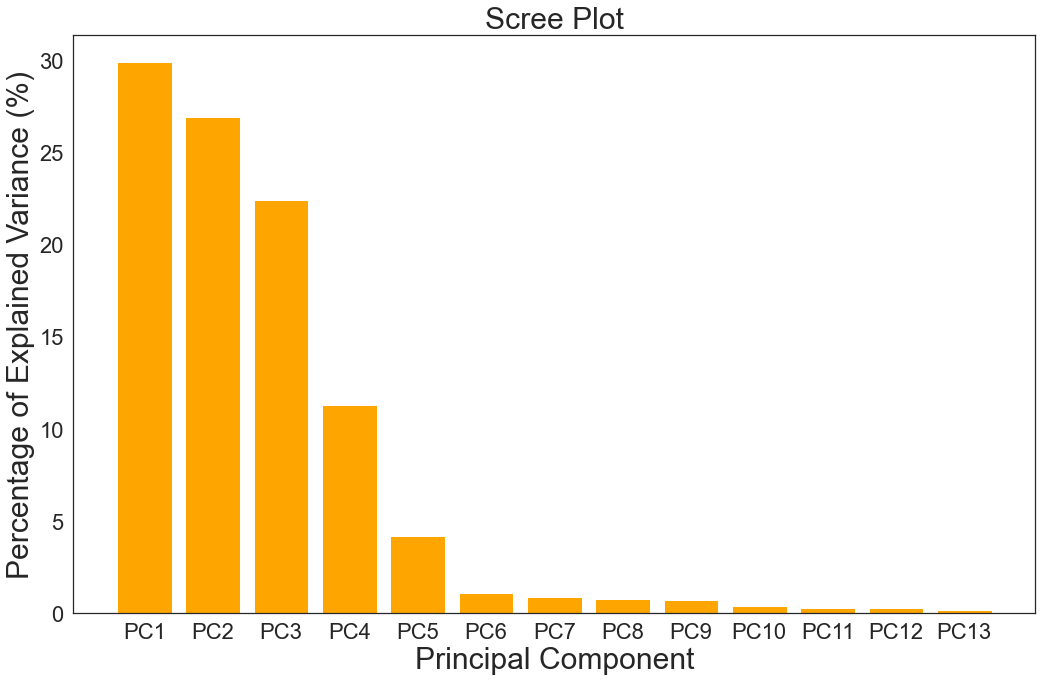

In [35]:
from sklearn.decomposition import PCA

print(f"Actual number of components: {len(X_train_val.columns.values)}")

n_pc = 13

pca = PCA(n_components=n_pc)
pca.fit(X_train_val)


per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

fig=plt.figure(1, figsize=(15,10))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels, color='orange')
plt.ylabel('Percentage of Explained Variance (%)', fontsize= 30)
plt.xlabel('Principal Component', fontsize= 30)
plt.title('Scree Plot', fontsize= 30)
plt.show()
 


In [36]:
#Selecting 8 PCs
n_pc = 8
pca = PCA(n_components=n_pc)
pca.fit(X_train_val)
#   X_train_val.index = pd.RangeIndex(start=0, stop=len(X_train_val), step=1)
PCA_train_val = pd.DataFrame(pca.transform(X_train_val))
PCA_test = pd.DataFrame(pca.transform(X_test))
PCA_train_val.columns = ['PC' + str(i) for i in range(1, n_pc+1) ]
PCA_test.columns = ['PC' + str(i) for i in range(1, n_pc+1) ]
PCA_train_val.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.348769,-0.685583,0.052446,1.050756,-0.505407,0.044744,-0.091526,0.078781
1,-0.643369,1.061405,-0.293921,-0.296757,-0.422651,-0.071011,0.097338,-0.127969
2,-1.059198,-0.272939,-0.287798,-0.231995,0.036354,0.035579,-0.019102,-0.064368
3,-1.042894,-0.286342,-0.294461,-0.240933,-0.040546,-0.183232,0.059585,-0.054887
4,-0.514051,-0.408130,1.048032,-0.404978,-0.246170,0.089340,0.009310,-0.055133


In [37]:
PCA_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.769286,0.675725,-0.057431,1.075088,-0.108067,-0.130132,0.025660,-0.037329
1,0.605444,0.681529,-0.923478,-0.032373,0.238283,-0.162749,0.018553,-0.015791
2,0.601177,0.675317,-0.885775,-0.063897,-0.015218,-0.054839,-0.063394,0.092831
3,0.186248,-0.674997,-0.834509,-0.037610,0.012350,-0.004759,-0.089587,0.109400
4,-1.048978,-0.278164,-0.300910,-0.229735,0.100738,-0.054603,-0.027735,0.039679


# Oversampling with SMOTE

In [45]:
APPLY_OVERSAMPLING = False      #ud 'True' SMOTE oversampling will be applied
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


In [43]:
model = SVC()
model.fit(X_train, y_train)

Y_pred = model.predict(X_test)
print

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,1,0,0,1,0,0,1,0,0.292929,...,0.086345,0.160138,0.087129,0.262055,0.002265,0.000000,0.000000,0.010525,0.003282,0.094578
1,1,0,0,1,0,0,1,0,0,0.030303,...,0.086773,0.160138,0.080648,0.260979,0.000000,0.000463,0.000000,0.000000,0.000000,0.000000
2,0,1,0,1,0,0,1,0,0,0.242424,...,0.086345,0.160138,0.080648,0.262211,0.000005,0.000000,0.000000,0.000000,0.003761,0.000000
3,0,1,0,1,0,0,1,0,0,0.040404,...,0.110197,0.198397,0.082639,0.259826,0.004579,0.002383,0.005580,0.008052,0.011723,0.009458
4,0,1,1,0,0,0,1,0,0,0.272727,...,0.087277,0.160138,0.083347,0.260979,0.000209,0.001009,0.000000,0.004383,0.000000,0.001969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36787,0,1,0,1,0,0,1,0,0,0.331148,...,0.091251,0.177528,0.098608,0.266878,0.023717,0.005312,0.020668,0.029259,0.018011,0.034719
36788,0,1,0,1,0,0,1,0,0,0.070707,...,0.103849,0.192819,0.115744,0.287732,0.002132,0.000000,0.004099,0.002513,0.000292,0.002538
36789,0,1,0,1,0,0,0,1,0,0.028567,...,0.106979,0.191517,0.109648,0.283767,0.000995,0.001625,0.000000,0.001083,0.001650,0.002350
36790,0,1,1,0,0,0,0,1,0,0.040404,...,0.114473,0.207771,0.131866,0.299880,0.000551,0.002160,0.000537,0.005750,0.001071,0.003601


# Support Vector Machines and Hyperparameter Tuning

In [39]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC

In [48]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],
    'C': [0.1, 1, 10]
}

grid_search_svm = GridSearchCV(SVC(),param_grid, scoring = "roc_auc",cv = 10, return_train_score=True, n_jobs = -1, refit = False, verbose = 1)
grid_search_svm.fit(X_train_val, y_train_val)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


KeyboardInterrupt: 

In [47]:
display(grid_search_svm.best_params_)
display(grid_search_svm.best_score_)

{'C': 1, 'degree': 2, 'kernel': 'rbf'}

0.7269770655800335

In [ ]:
#Model Training SVM GRID SEARCH
# C_values = [0.001,0.005,0.01,0.05,0.1,5,10,50,100,500,1000]



C_values = [0.001,0.1,10,1000]

tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e2,1e1,1e-0,1e-1,1e-2], "C": C_values, "class_weight": ["balanced"]},
    {"kernel": ["linear"], "C": C_values,  "class_weight": ["balanced"]},
    {"kernel": ["poly"], "degree": [2,3,4], "C": C_values,  "class_weight": ["balanced"]},
    
]

# param_grid_SVM = {
#     'kernel': ["linear", "rbf","poly"],
#     'C': [0,0.01,1,100],
#     "degree": [2,3],
#     'gamma': [0.01,0.1,10,100],
#     'class_weight': ["balanced"]
# }

#BY DEFAULT STRATIFIED CROSS VALIDATOIN NO NEED TO SPECIFY

grid_search_svm = GridSearchCV(SVC(),tuned_parameters, scoring = "roc_auc",cv = 10, return_train_score=True, n_jobs = -1, refit = False, verbose = 1) 

grid_search_svm.fit(PCA_train_val, y_train)


Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [ ]:
grid_search_svm_results = pd.DataFrame(grid_search_svm.cv_results_)

temp = pd.melt(grid_search_svm_results, id_vars=["param_kernel"], value_vars=['mean_test_score', 'mean_train_score'])

temp.rename(columns = {"value": "AUC_Score"}, inplace = True)
sns.boxplot(data = temp, x = "param_kernel", y = "AUC_Score", hue = "variable")
plt.show()
# sns.boxplot(data = grid_search_svm_results, x = "param_kernel", y = "mean_test_score")
# plt.show()
# sns.boxplot(data = grid_search_svm_results, x = "param_kernel", y = "mean_test_score")
# plt.show()



temp = grid_search_svm_results[grid_search_svm_results.param_kernel == "linear"]

temp = pd.melt(temp, id_vars=[f"param_C"], value_vars=['mean_test_score', 'mean_train_score']).rename(columns = {"value": "AUC_Score"})
# temp.rename(columns = {"value": "AUC_Score"}, inplace = True)

grid = sns.lineplot(data = temp, x = f"param_C", y = "AUC_Score", hue = "variable")
grid.set(xscale="log")
grid.plot()
plt.show()